<a href="https://colab.research.google.com/github/Gayatrii23/actors/blob/main/StudentSocialMediaAddiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Social Media Addiction Analysis

In [ ]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline

import seaborn as sns

# Scikit-learn modules for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set plot style for seaborn
sns.set(style='whitegrid')


In [ ]:
import pandas as pd

# Just the file name
df = pd.read_csv('Students Social Media Addiction.csv')

# Display first few rows
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

# Convert categorical variables to the correct type if necessary - example:
categorical_columns = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Optionally, drop any rows with critical missing values (if encountered)
# df = df.dropna()

# Check the updated info
df.info()

Missing values in each column:
 Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Student_ID                    705 non-null    int64   
 1   Age                           705 non-null    int64   
 2   Gender                        705 non-null    category
 3   Academic_Level                705 non-null    category
 4   Country                       705 non-null 

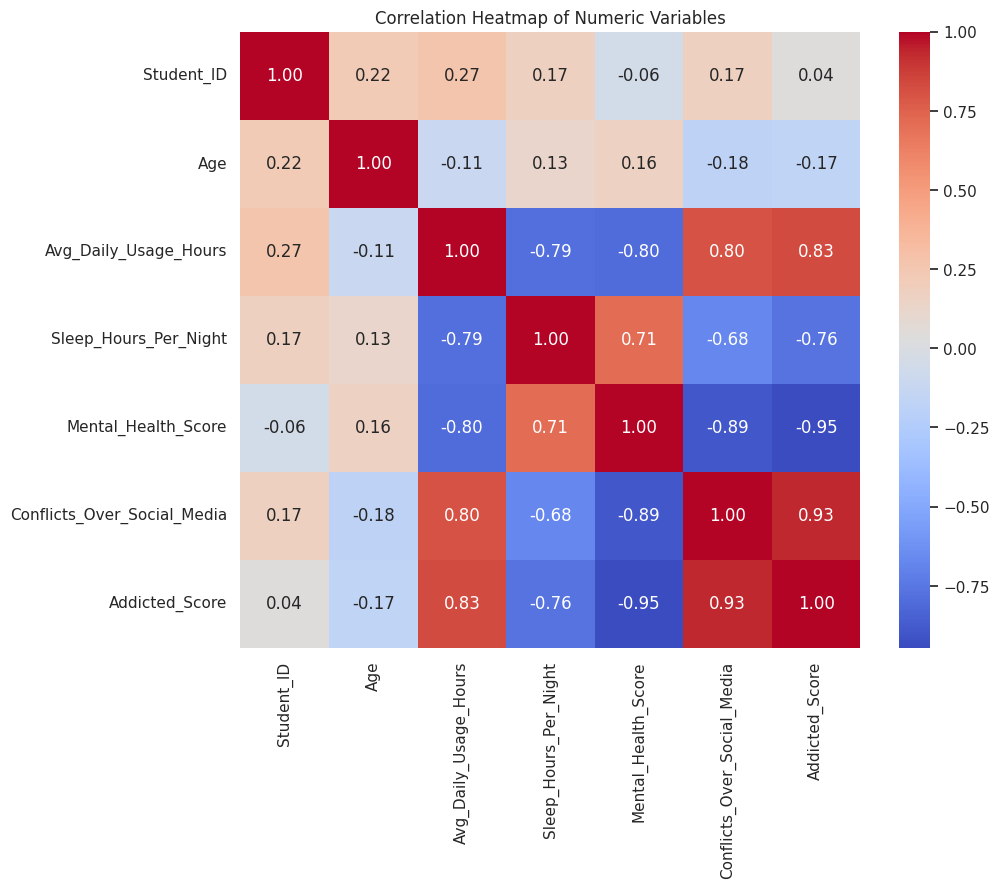

In [ ]:
# Selecting numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap if there are four or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

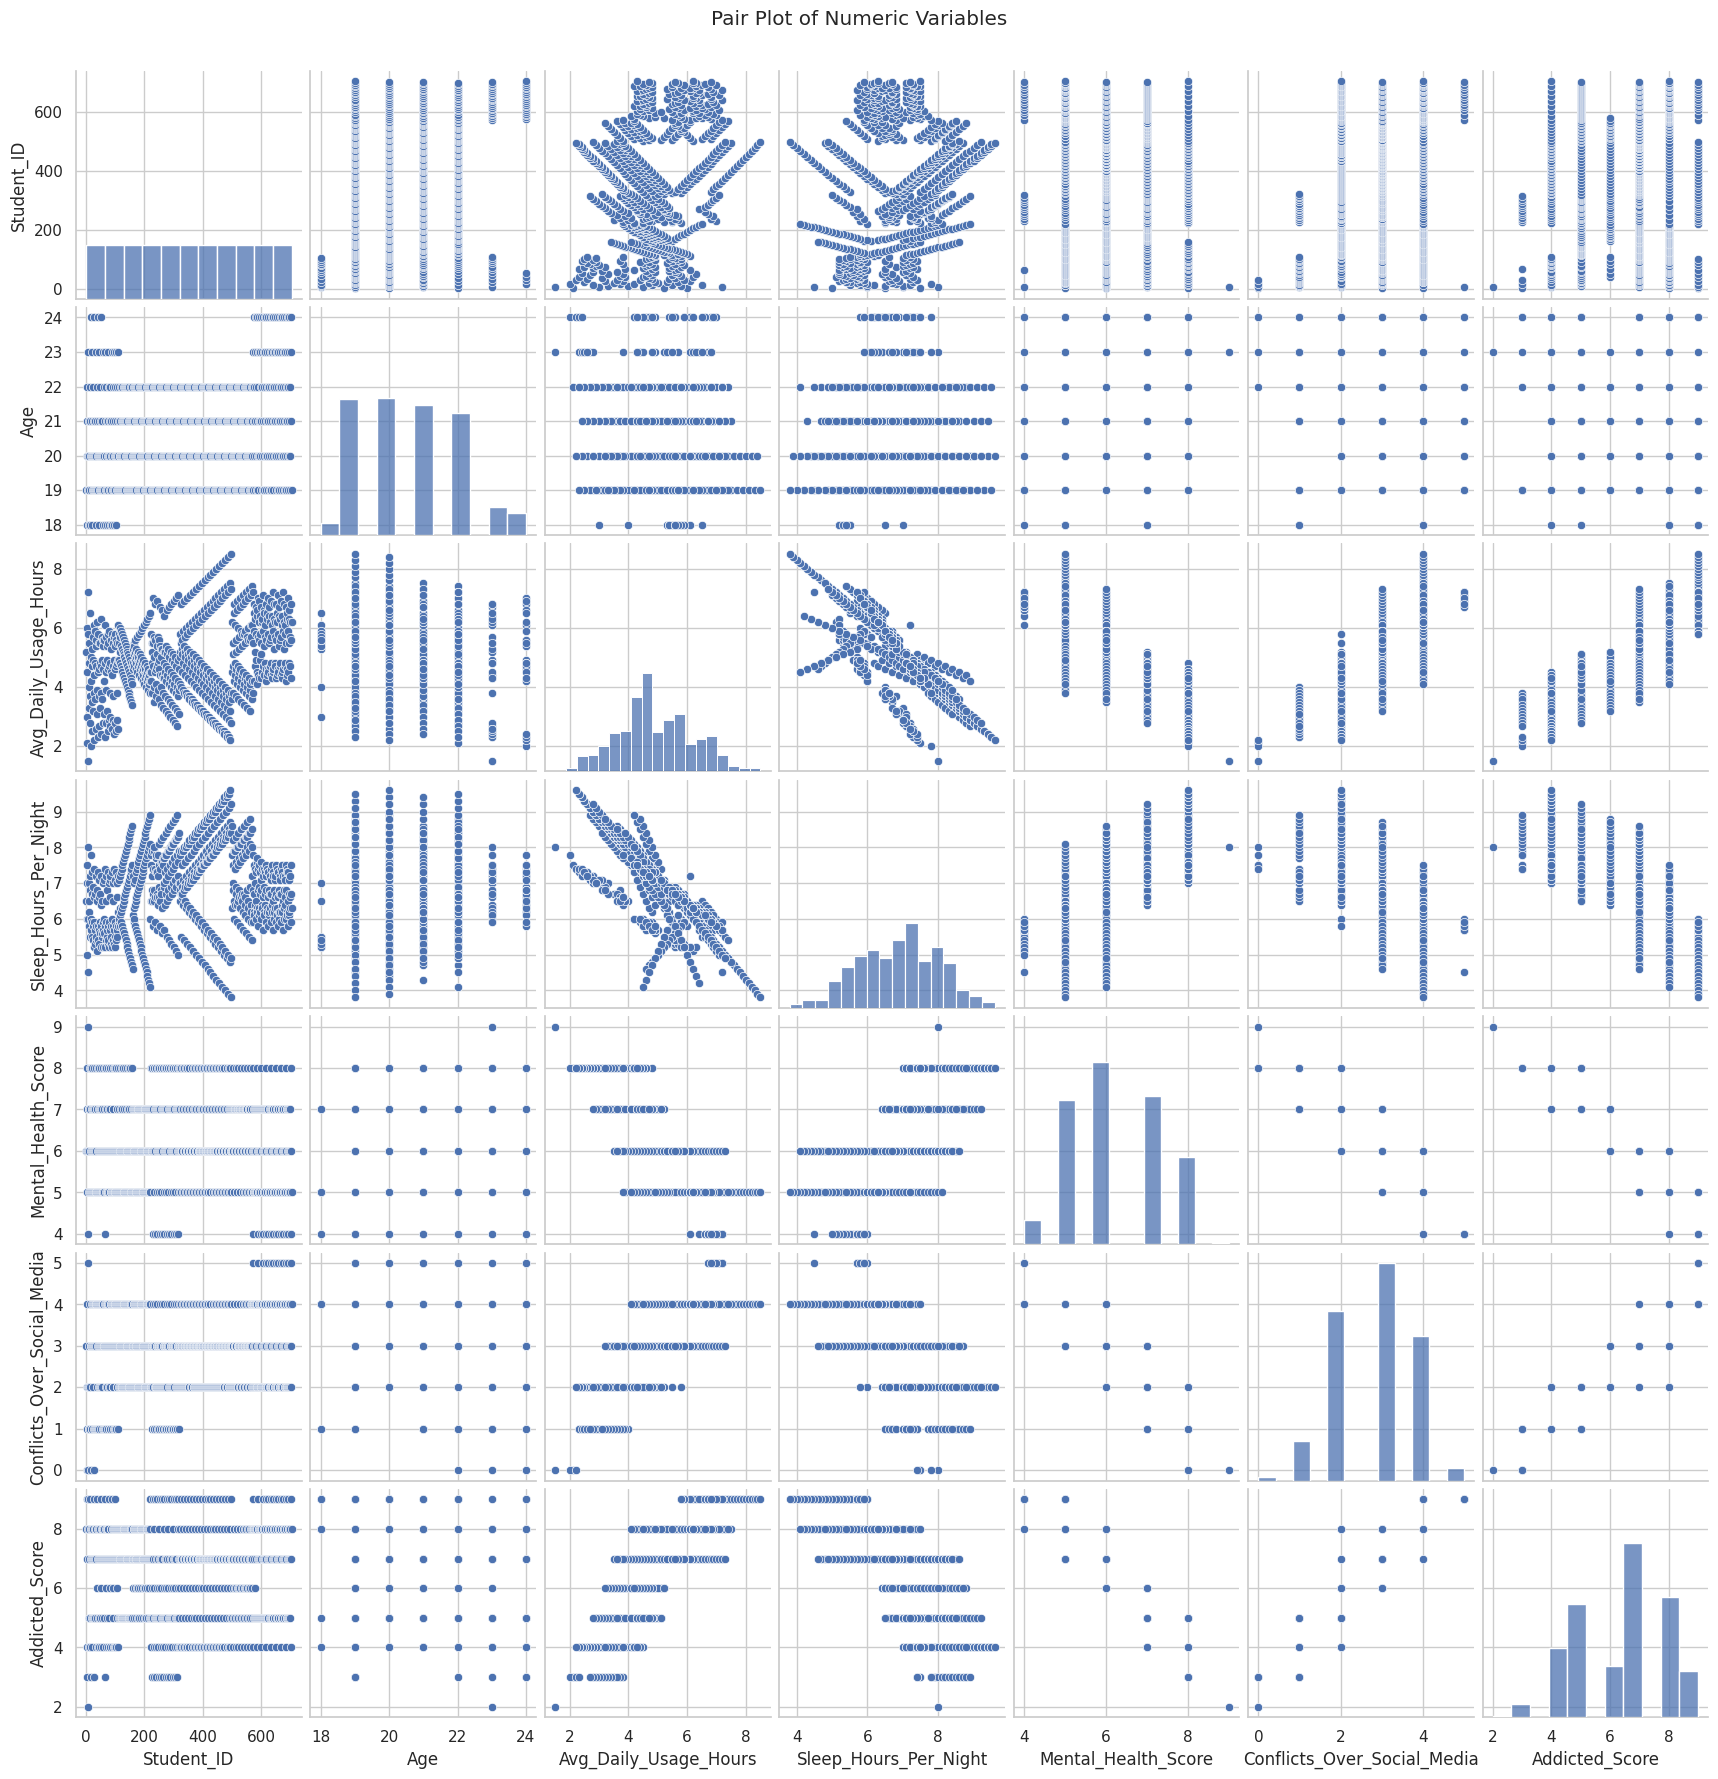

In [ ]:
# Pair Plot for numeric variables
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

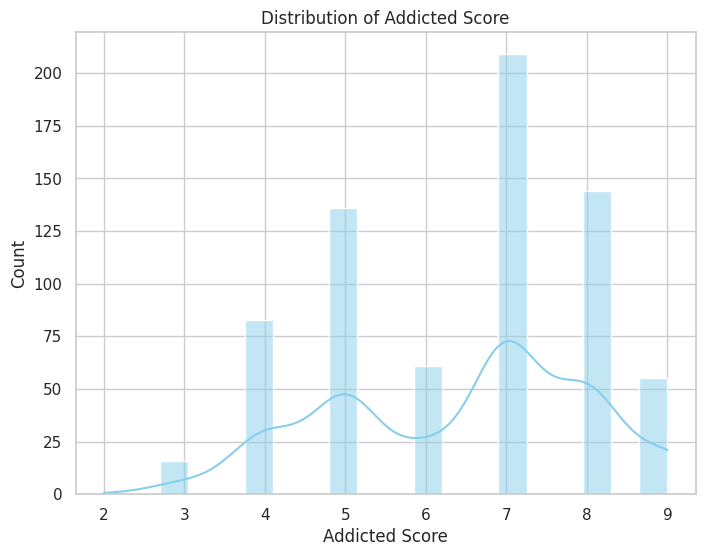

In [ ]:
# Histogram for the 'Addicted_Score' variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Addicted_Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Addicted Score')
plt.xlabel('Addicted Score')
plt.ylabel('Count')
plt.show()

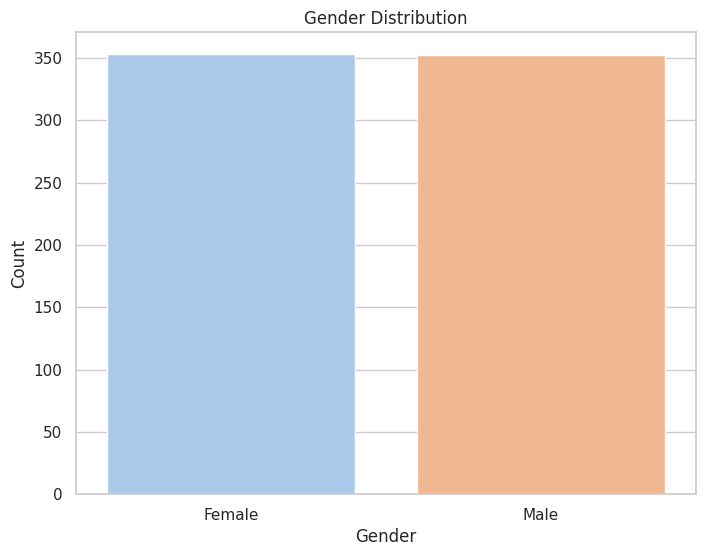

In [ ]:
# Pie Chart (using countplot as a proxy) for Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Prepare data for prediction
# Selecting predictor variables based on domain idea
predictors = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']
target = 'Addicted_Score'

# Ensure that predictor columns exist and there are no missing values
df_model = df[predictors + [target]].dropna()

# Split the data into training and testing subsets
X = df_model[predictors]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R² Score
r2 = r2_score(y_test, y_pred)
print('R² Score of the Linear Regression model: {:.2f}'.format(r2))

R² Score of the Linear Regression model: 0.95
